# Foundations of Data Mining: Assignment 2

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = '11e82c8d91c5abece86f424369c71590'

## Kernel selection (4 points (1+2+1))
SVMs can be trained with different kernels. Generate a 2-dimensional dataset as shown below and study the effect of the choice of kernel by visualizing the results.

- Train a SVM classifier on the dataset using respectively a linear, polynomial and radial basis function (RBF) kernel, evaluate the performance of each kernel using 10-fold cross-validation and AUC. Which one works best? Visualize the results. Can you intuitively explain why one kernel is more suited than another?
    - Hint: you can use the visualization code used in class. It is under mglearn/plot_svm.py > plot_svm_kernels().
- Take the RBF kernel and vary both the C parameter and the kernel width ($\gamma$). Use 3 values for each (a very small, default, and very large value). For each of the 9 combinations, create the same RBF plot as before, report the number of support vectors, and the AUC performance. Explain the performance results. When are you over/underfitting?
    - Hint: values for C and $\gamma$ are typically in [$2^{-15}..2^{15}$] on a log scale. 
    - Hint: don't count the support vectors manually, retrieve them from the trained SVM.
- Vary C and $\gamma$ again, but this time use a grid of at least 20x20, vary both parameters uniformly on a log scale, and visualise the results using a $C \times \gamma \rightarrow AUC$ heatmap. Explain the performance results, and compare them to the 9 results obtained in the previous subquestion. Can you also tell in which regions of the heatmap you are over/underfitting?
    - Hint: We've constructed such a heatmap in class and in assignment 1.

In [34]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, n_samples=1000, random_state=0)

Train a SVM classifier on the dataset using respectively a linear, polynomial and radial basis function (RBF) kernel, evaluate the performance of each kernel using 10-fold cross-validation and AUC. Which one works best? Visualize the results. Can you intuitively explain why one kernel is more suited than another?
Hint: you can use the visualization code used in class. It is under mglearn/plot_svm.py > plot_svm_kernels().

In [35]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

kernels = ['linear', 'poly', 'rbf']

for k in kernels:
    clf = svm.SVC(kernel=k)
    scores = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
    mean_score = scores.mean()
    print("Kernel: {} Score: {}".format(k, mean_score))

Kernel: linear Score: 0.9936400000000001
Kernel: poly Score: 0.9928800000000001
Kernel: rbf Score: 0.9768000000000001


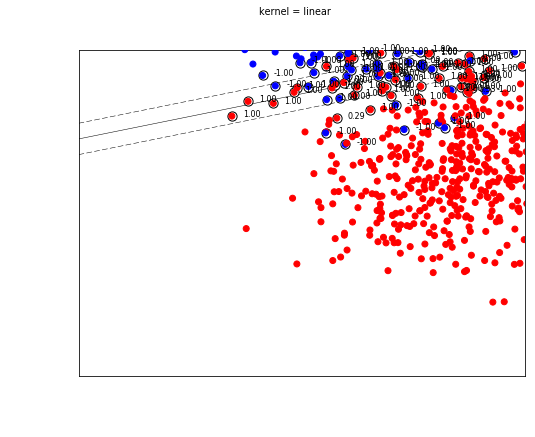

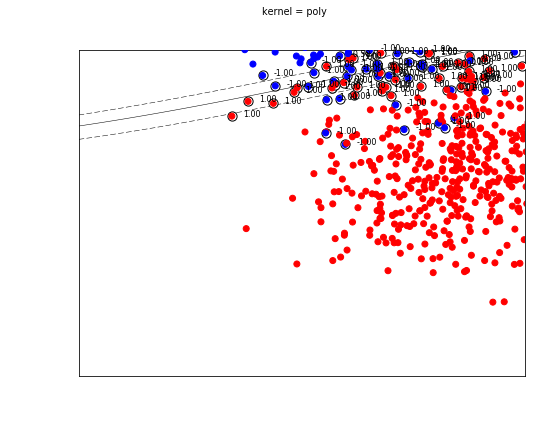

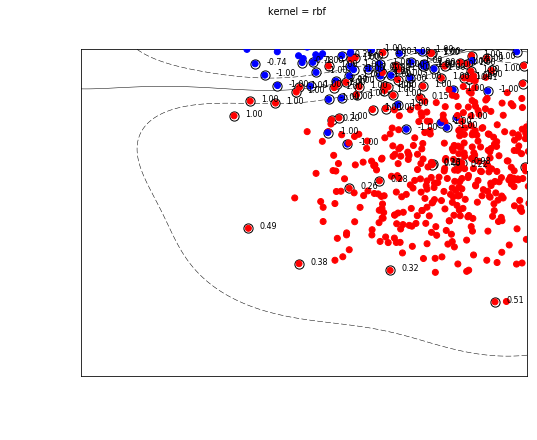

In [48]:
def plot_svm_kernels(X, Y):
    # figure number
    fignum = 1

    # fit the model
    for kernel in ('linear', 'poly', 'rbf'):
        clf = clf = svm.SVC(kernel=kernel)
        clf.fit(X, Y)

        # plot the line, the points, and the nearest vectors to the plane
        plt.figure(fignum, figsize=(8, 6))
        plt.suptitle('kernel = %s' % kernel)

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                    s=85, edgecolors='k', c='w', zorder=10)
        plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.bwr)

        for i, coef in enumerate(clf.dual_coef_[0]):
            plt.annotate("%0.2f" % (coef), (clf.support_vectors_[i, 0]+0.15,clf.support_vectors_[i, 1]), fontsize=8, zorder=11)

        plt.axis('tight')
        x_min = -3
        x_max = 3
        y_min = -3
        y_max = 3

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(4, 3))
        #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.bwr, alpha=0.1)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
    plt.show()
     
plot_svm_kernels(X, y)

The linear and ploynomial kernel give the best result. The RBF kernel is a bit worse. When looking at the pictures a possible explanation can be seen. The data seems to be linear seperable, although there is some noise. The RBF kernel seems to be affected a bit more by the noise. 

- Take the RBF kernel and vary both the C parameter and the kernel width ($\gamma$). Use 3 values for each (a very small, default, and very large value). For each of the 9 combinations, create the same RBF plot as before, report the number of support vectors, and the AUC performance. Explain the performance results. When are you over/underfitting?
    - Hint: values for C and $\gamma$ are typically in [$2^{-15}..2^{15}$] on a log scale. 
    - Hint: don't count the support vectors manually, retrieve them from the trained SVM.


C: 0.0009765625, gamma: 0.0009765625, support vectors: 1000, auc: 0.9934
C: 0.0009765625, gamma: auto, support vectors: 1000, auc: 0.9879200000000001
C: 0.0009765625, gamma: 1024, support vectors: 1000, auc: 0.96098


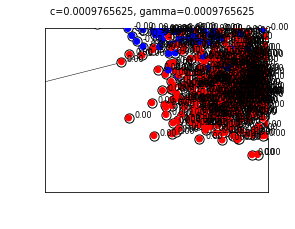

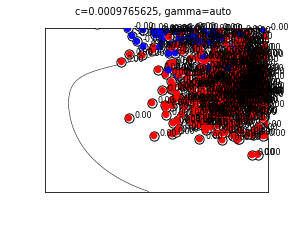

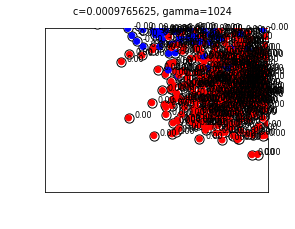

C: 1, gamma: 0.0009765625, support vectors: 394, auc: 0.99328
C: 1, gamma: auto, support vectors: 136, auc: 0.9768000000000001
C: 1, gamma: 1024, support vectors: 996, auc: 0.96112


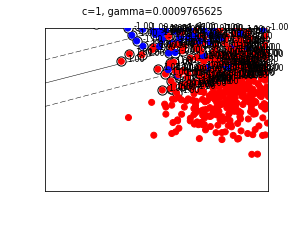

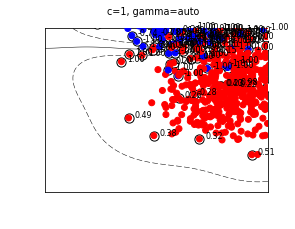

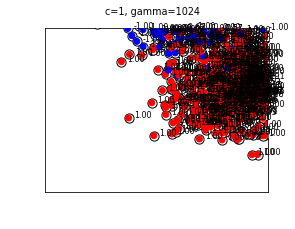

C: 1024, gamma: 0.0009765625, support vectors: 107, auc: 0.9935599999999999
C: 1024, gamma: auto, support vectors: 98, auc: 0.9894000000000002
C: 1024, gamma: 1024, support vectors: 995, auc: 0.96024


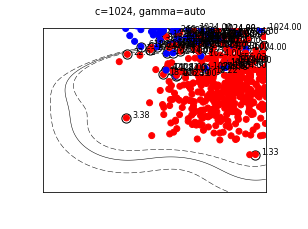

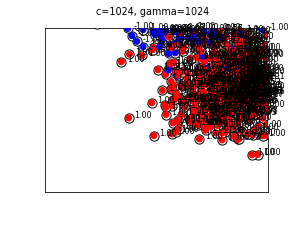

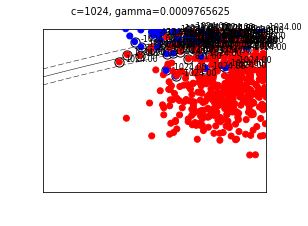

In [49]:
def plot_svm_kernel_params(X, Y):
    # figure number
    fignum = 1

    # fit the model
    for c in [2**-10, 1, 2**10]:
        for gamma in [2**-10, 'auto', 2**10]:
            clf = svm.SVC(kernel='rbf', C=c, gamma=gamma)
            scores = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
            auc = scores.mean()
 
            clf.fit(X, Y)

            print("C: {}, gamma: {}, support vectors: {}, auc: {}".format(c, gamma, len(clf.support_vectors_), auc))

            # plot the line, the points, and the nearest vectors to the plane
            plt.figure(fignum, figsize=(4, 3))
            plt.suptitle('c={}, gamma={}'.format(c, gamma))

            plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                        s=85, edgecolors='k', c='w', zorder=10)
            plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.bwr)

            for i, coef in enumerate(clf.dual_coef_[0]):
                plt.annotate("%0.2f" % (coef), (clf.support_vectors_[i, 0]+0.15,clf.support_vectors_[i, 1]), fontsize=8, zorder=11)

            plt.axis('tight')
            x_min = -3
            x_max = 3
            y_min = -3
            y_max = 3

            XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
            Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

            # Put the result into a color plot
            Z = Z.reshape(XX.shape)
            plt.figure(fignum, figsize=(8, 6))
            #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.bwr, alpha=0.1)
            plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                        levels=[-.5, 0, .5])

            plt.xlim(x_min, x_max)
            plt.ylim(y_min, y_max)

            plt.xticks(())
            plt.yticks(())
            fignum = fignum + 1
        plt.show()

plot_svm_kernel_params(X, y)

When looking at the results, the gamma value seems to be the parameter that affects the end result the most. When we increase the gamma value, the AUC value seems to decrease. The figures show that if the gamma values are increased, the decision boundary gets more complex. Therefore it seems like the model starts to overfit.  When the C paramater is increased the AUC scores go down very slightly. The differences are too minor though to conclude that this leads to over or underfitting.

- Vary C and $\gamma$ again, but this time use a grid of at least 20x20, vary both parameters uniformly on a log scale, and visualise the results using a $C \times \gamma \rightarrow AUC$ heatmap. Explain the performance results, and compare them to the 9 results obtained in the previous subquestion. Can you also tell in which regions of the heatmap you are over/underfitting?
    - Hint: We've constructed such a heatmap in class and in assignment 1.

In [38]:
from sklearn.model_selection import GridSearchCV
clf = svm.SVC(kernel='rbf')
grid = {
    "C": [2**i for i in range(-20, 21, 2)],
    "gamma": [2**i for i in range(-20, 21,2)]
}

grid_search = GridSearchCV(estimator=clf, param_grid=grid, scoring='roc_auc')
grid_search = grid_search.fit(X, y)

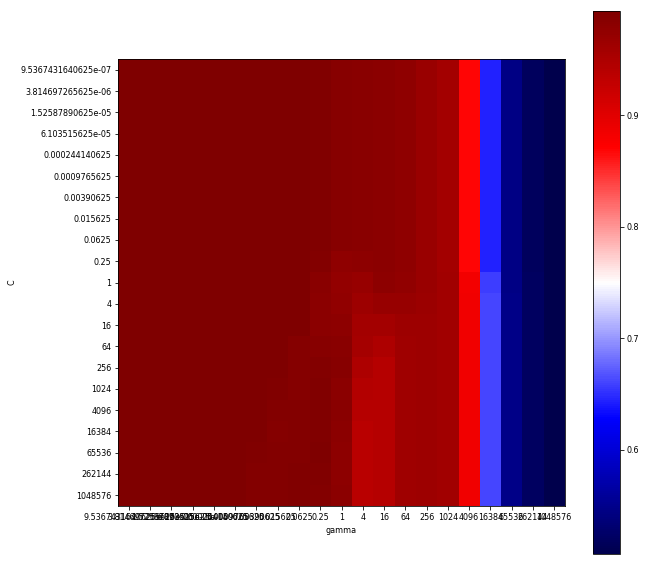

In [47]:
import matplotlib.cm as cm   
import matplotlib as mpl
from pandas import DataFrame

df = DataFrame(grid_search.cv_results_)

C = list(map(lambda x: x['C'], df['params']))
gamma = list(map(lambda y: y['gamma'], df['params']))

fig, ax = plt.subplots(figsize=(10,10))
score_array = np.array(grid_search.cv_results_['mean_test_score'])

arr = np.reshape(score_array, (len(grid['C']), len(grid['gamma'])), order='C')
im = ax.imshow(arr, cmap=plt.cm.seismic)

_ = ax.set_xticks(np.arange(arr.shape[1]), minor=False)
_ = ax.set_yticks(np.arange(arr.shape[0]), minor=False)
_ = ax.set_xticklabels(grid['gamma'])
_ = ax.set_yticklabels(grid['C'])
_ = ax.set_xlabel("gamma")
_ = ax.set_ylabel("C")

_ = fig.colorbar(im)
plt.show()

When the values of the gamma value increases the auc score seems to go down. There seems to be a sharp turning point at 4096 for the gamma value. After that the auc score goes down very quickly. In the previous part we have seen that the cause of this is that the SVM starts to overfit. 

## Robots and SVMs (4 points (2+1+1))

The [Wall Robot Navigation dataset](http://www.openml.org/d/1497) contains about 5500 readings of an ultrasound sensor array mounted on a robot, and your task is to finetune and train an SVM classifier to predict how the robot should move next.

- Make a stratified 80-20 split of the data. On the training set alone, optimize the main hyperparameters of the SVM for AUC with a random search. Vary at least the main kernel types (linear, polynomial, and RBF), the C parameter, the $\gamma$ parameter for the RBF kernel and the exponent/degree for the polynomial kernel. Report the optimal hyperparameter settings and AUC performance. 
    - The degree of the polynonial is typically in the range 2..10.
    - Hint: note that the hyperparameter ranges depend on each other. For instance, $\gamma$ only makes sense if you have selected the RBF kernel as well. We've seen in class how to define multiple hyperparameter spaces in a random/grid search.
- Use a 5x3-fold (5 outer, 3 inner) nested cross-validation (CV) on the training set to obtain a clean evaluation. Evaluate your optimized hyperparameter settings on the separate test set and discuss the result. Is the performance on the independent test set comparable with the result of the random search?
    - Hint: for the nested resampling, use at least a 10-fold CV for the outer loop. The inner loop can be a 3-fold CV or a simple holdout.
- Train an SVM using the optimal hyperparameter configuration you found and test it on the held out (20%) test set. Compare this AUC result with the (mean) result of the nested CV. If you would build this robot in practice, how would you find the hyperparameters to use, and which performance would you expect? Is it truly necessary to tune the hyperparameters? Which hyperparameters were most important to tune?

In [50]:
robot_data = oml.datasets.get_dataset(1497) # Download Robot data
# Get the predictors X and the labels y
X, y = robot_data.get_data(target=robot_data.default_target_attribute);

- Make a stratified 80-20 split of the data. On the training set alone, optimize the main hyperparameters of the SVM for AUC with a random search. Vary at least the main kernel types (linear, polynomial, and RBF), the C parameter, the $\gamma$ parameter for the RBF kernel and the exponent/degree for the polynomial kernel. Report the optimal hyperparameter settings and AUC performance. 
    - The degree of the polynonial is typically in the range 2..10.
    - Hint: note that the hyperparameter ranges depend on each other. For instance, $\gamma$ only makes sense if you have selected the RBF kernel as well. We've seen in class how to define multiple hyperparameter spaces in a random/grid search.

In [51]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, stratify=y)
print("Train data size: {}, Test data size: {}".format(len(train_X), len(test_X)))

Train data size: 4364, Test data size: 1092


In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

params= {
    'kernel': ['linear', 'poly',    'rbf'],
    'C': [2**i for i in range(-20, 21, 2)],
    'gamma': [2**i for i in range(-20, 21, 2)],
    'degree': [i for i in range(2, 11)]
}

grid = RandomizedSearchCV(estimator=SVC(
    max_iter = 10000000
), param_distributions=params, scoring='accuracy', n_jobs=-1, random_state=0)
_ = grid.fit(train_X, train_y)

print(grid.best_score_)
print(grid.best_params_)

0.923464711274
{'gamma': 0.0009765625, 'C': 16384, 'degree': 5, 'kernel': 'rbf'}


- Use a 5x3-fold (5 outer, 3 inner) nested cross-validation (CV) on the **whole** dataset to obtain a clean evaluation. What is the mean optimized performance? Is this in line with the optimized result of the random search of the previous question?

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

params= {
    'kernel': ['linear', 'poly',    'rbf'],
    'C': [2**i for i in range(-20, 21, 2)],
    'gamma': [2**i for i in range(-20, 21, 2)],
    'degree': [i for i in range(2, 11)]
}

grid2 = RandomizedSearchCV(cv=3, estimator=SVC(
    max_iter = 10000000
), param_distributions=params, scoring='accuracy', n_jobs=-1, random_state=0)

scores = cross_val_score(grid2, X, y, cv=5)

print("Train score: {}".format(scores.mean()))

Train score: 0.8794419024302172


The train score is lower than only using random search. The reason for this is tha thte random search only does 3-fold cross validation. This means that only 66% from the training data of the outer cross validation is used for training. This means that the models are trained on 66% * 80% = 52.8% of the total data. In the previous part 90% * 80% = 72% of the data was used for training. This thus yields in a better result.  

- Train an SVM using the optimal hyperparameter configuration you found and test it on the held out (20%) test set. Compare this AUC result with the (mean) result of the nested CV. If you would build this robot in practice, how would you find the hyperparameters to use, and which performance would you expect? Is it truly necessary to tune the hyperparameters? Which hyperparameters were most important to tune?

In [68]:
from sklearn.metrics import accuracy_score
import pandas as pd

clf = SVC(**grid.best_params_)

_ = clf.fit(train_X, train_y)

predicted = clf.predict(test_X)

score = accuracy_score(test_y, predicted)

df = pd.DataFrame(grid.cv_results_)


print("Params: {}".format(grid.best_params_))
print("Score: {}".format(score))

print("Cross validation scores")
print(df['mean_test_score'])


Params: {'gamma': 0.0009765625, 'C': 16384, 'degree': 5, 'kernel': 'rbf'}
Score: 0.9258241758241759
Cross validation scores
0    0.40
1    0.90
2    0.92
3    0.57
4    0.40
5    0.71
6    0.40
7    0.62
8    0.74
9    0.74
Name: mean_test_score, dtype: float64


The score is much closer to the score of the 10 fold cross validation. When looking at the cross validation scores of the different parameters test in the grid search, we see that there is a big difference between the 10 tries. Therefore it seems that hyperparameter tuning is necessary. From the previous exercise we know tha the kernel and the gamma value affect the result the most. 

## A benchmark study (3 points (2+1))

A benchmark study is an experiment in which multiple algorithms are evaluated on multiple datasets. The end goal is to study whether one algorithm is generally better than the others. Meaningful benchmark studies can grow quite complex, here we do a simplified variant.

* Download OpenML datasets 37, 42, 188, 470, and 1464. They are sufficiently large (e.g., at least 500 data points) so that the performance estimation is trustworthy. Select at least three classifiers that we discussed in class, e.g. kNN, Logistic Regression, Random Forests, Gradient Boosting, SVMs, Naive Bayes. Note that some of these algorithms take longer to train. Evaluate all classifiers (with default parameter settings) on all datasets, using a 10-fold CV and AUC. Show the results in a table and interpret them. Which is the best algorithm in this benchmark?
    * Note that these datasets have categorical features, different scales, missing values, and (likely) irrelevant features. You'll need to build pipelines to correctly build all models.
    * Hint: You can either compare the performances directly, or (better) use a statistical significance test, e.g. a pairwise t-test or (better) Wilcoxon signed ranks test, to see whether the performance differences are significant. This is covered in statistics courses. You can then count wins, ties and losses.
* Repeat the benchmark, but now additionally optimize the main hyperparameters of each algorithm in a grid or random search (don't overdo it). Does this affect the ranking of the algorithms?

* Download OpenML datasets 37, 42, 188, 470, and 1464. They are sufficiently large (e.g., at least 500 data points) so that the performance estimation is trustworthy. Select at least three classifiers that we discussed in class, e.g. kNN, Logistic Regression, Random Forests, Gradient Boosting, SVMs, Naive Bayes. Note that some of these algorithms take longer to train. Evaluate all classifiers (with default parameter settings) on all datasets, using a 10-fold CV and AUC. Show the results in a table and interpret them. Which is the best algorithm in this benchmark?

In [69]:
import openml
# Create a dict with all X, y values
datasets = dict([(k, openml.datasets.get_dataset(k)) for k in [37, 470, 1120, 1464,1471]])# 188, 470, 1464]])
for k in datasets:
    datasets[k] = datasets[k].get_data(target=datasets[k].default_target_attribute)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.pipeline import Pipeline

classifiers = [
    ('knn', KNeighborsClassifier()),
    ('rfc', RandomForestClassifier()),
    ('svm', SVC())
]

all_scores = {}

for i in datasets:
    all_scores[i] = {}
    X, y = datasets[i]
    for (clf_name, clf) in classifiers:        
        scores = cross_val_score(Pipeline([
            ('impute',  Imputer(missing_values='NaN')),
            ('scale', MinMaxScaler()),
            ('feature_selection', SelectPercentile(percentile=75)),
            ('clf', clf)
        ]), X, y, cv=10, scoring='roc_auc') #roc_auc doesn't deal with multiclass
        all_scores[i][clf_name] = scores

In [71]:
from pandas import DataFrame
from scipy.stats import wilcoxon

data = {
    'dataset': [],
    'knn_mean': [],
    'svm_mean': [],
    'rfc_mean': [],
    'svm_score': [],
    'knn_score': [],
    'rfc_score': []
}

clf_names = ['knn', 'rfc', 'svm']


for dataset in all_scores:
    data['dataset'].append(dataset)
    scores = all_scores[dataset]
    for c1 in clf_names:
        total_score = 0
        c1_scores = scores[c1]
        for c2 in clf_names:
            c2_scores = scores[c2]
            statistic, p_value = wilcoxon(c1_scores, c2_scores)
            if statistic == 0:
                continue # Exactly the same score
            
            # There is a significant difference
            if p_value < 0.05:
                if c1_scores.mean() < c2_scores.mean():
                    total_score -= 1
                else:
                    total_score += 1
        data[c1 + '_mean'].append(c1_scores.mean())
        data[c1 + '_score'].append(total_score)
    
print(DataFrame(data=data))

   dataset  knn_mean  knn_score  rfc_mean  rfc_score  svm_mean  svm_score
0     1120      0.87          0      0.91          0      0.85          0
1     1464      0.55         -2      0.60          1      0.67          1
2       37      0.78         -1      0.80         -1      0.83          2
3      470      0.46         -1      0.57          1      0.63          0
4     1471      0.46          0      0.50          0      0.41          0


After running all the cross_validation, a Wilcoxon test was used to see if the scores where of a different distribution. For each dataset the scores where tested for each pair of classifiers. When the Wilxocon test reported a p_value < 0.05 (i.e. there is good evidence that the results are from different distirbutions) one point was added to the score of the best classifier, and one point was subtracted from the losing classifier. In the above table the results for all the datasets are shown. 

What can be seen in the table is that the SVM classifier scores in general the best, with the exception of dataset 470. The KNN classifier scores the worst for all dataset. The Random Forest Classifier is in between.

Repeat the benchmark, but now additionally optimize the main hyperparameters of each algorithm in a grid or random search (don't overdo it). Does this affect the ranking of the algorithms?

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


classifiers = [
    ('knn', KNeighborsClassifier()),
    ('rfc', RandomForestClassifier()),
    ('svm', SVC())
]

grid = {
    'knn': {
        'clf__n_neighbors': [1, 3, 5, 10, 20],
        'clf__leaf_size': [10, 30, 50]
    },
    'rfc': {
        'clf__n_estimators': [1, 2, 4, 8, 16, 32]
    },
    'svm': {
        'clf__kernel': ['linear', 'poly', 'rbf'],
        'clf__C': [0.001, 1],
        'clf__gamma': [0.001, 1]
    }
}

all_scores = {}

for i in datasets:
    all_scores[i] = {}
    X, y = datasets[i]
    for (clf_name, clf) in classifiers:        
        search = GridSearchCV(Pipeline([
            ('impute',  Imputer(missing_values='NaN')),
            ('scale', MinMaxScaler()),
            ('feature_selection', SelectPercentile(percentile=75)),
            ('clf', clf)
        ]), cv=10, scoring='roc_auc', param_grid=grid[clf_name]) #roc_auc doesn't deal with multiclass
        
        _ = search.fit(X, y)
        scores = cross_val_score(search.best_estimator_, X, y, cv=10, scoring='roc_auc') #roc_auc doesn't deal with multiclass
        
        all_scores[i][clf_name] = scores

In [79]:
from pandas import DataFrame
from scipy.stats import wilcoxon

data = {
    'dataset': [],
    'knn_mean': [],
    'svm_mean': [],
    'rfc_mean': [],
    'svm_score': [],
    'knn_score': [],
    'rfc_score': []
}

clf_names = ['knn', 'rfc', 'svm']


for dataset in all_scores:
    data['dataset'].append(dataset)
    scores = all_scores[dataset]
    for c1 in clf_names:
        total_score = 0
        c1_scores = scores[c1]
        for c2 in clf_names:
            c2_scores = scores[c2]
            statistic, p_value = wilcoxon(c1_scores, c2_scores)
            if statistic == 0:
                continue # Exactly the same score
            
            # There is a significant difference
            if p_value < 0.05:
                if c1_scores.mean() < c2_scores.mean():
                    total_score -= 1
                else:
                    total_score += 1
        data[c1 + '_mean'].append(c1_scores.mean())
        data[c1 + '_score'].append(total_score)
    
print(DataFrame(data=data))

   dataset  knn_mean  knn_score  rfc_mean  rfc_score  svm_mean  svm_score
0     1120      0.90          1      0.93          0      0.89         -1
1     1464      0.67          0      0.60         -1      0.77          1
2       37      0.82         -1      0.82         -1      0.84          2
3      470      0.51         -1      0.53         -1      0.64          2
4     1471      0.47          0      0.50          0      0.49          0


The table above gives the same results as we had previously, but now we have first done hyperparameter optimization for all three classifiers. SVM still seems to be the best classifier. However, the KNN classifier seems to have increased a lot. It is now as least as good on all datasets than the RFC. And for one dataset it is even better than the SVM classifier. For nearly all cases the scores have increased. Thus preprocessing helps a lot, especially for the KNN classifier

## Gaussian Processes (2 points (1+1))

Consider the RAM prices dataset (included in the data folder). Separate the data in a training set of all data points up until the year 2000, and a test set with all points after that.

- Train several of the algorithms we have covered in the course that can handle regression. Include at least linear regression, decision tree, and RandomForest. Which ones give the best $R^2$ performance on the test set? Plot the predictions (both on the training and test data) on the figure below. Use different colors for different algorithms or build multiple plots.
- Train a Gaussian process on an increasing amount of samples of the training data. Start with 5 random sample and plot the predictions (both the mean and the uncertainty interval) for both training and test data, as shown in class. Now add a few more points and retrain and redraw. Do this a couple of times and interpret/explain what you see. Finally, train the Gaussian on the full dataset and again show plot the predictions. Evaluate on the test set using  $R^2$. Compare these results with those achieved with other algorithms and explain.

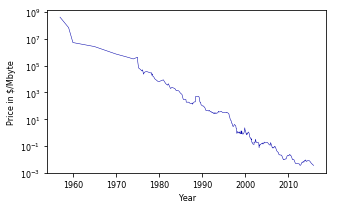

In [80]:
ram_prices = pd.read_csv('data/ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");

Consider the RAM prices dataset (included in the data folder). Separate the data in a training set of all data points up until the year 2000, and a test set with all points after that.

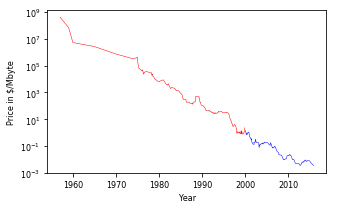

In [81]:
train_data = ram_prices[ram_prices.date < 2000]
test_data = ram_prices[ram_prices.date > 2000]
ram_prices = pd.read_csv('data/ram_price.csv')

plt.semilogy(train_data.date, train_data.price, 'r-', test_data.date, test_data.price, 'b-')
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");

- Train several of the algorithms we have covered in the course that can handle regression. Include at least linear regression, decision tree, and RandomForest. Which ones give the best $R^2$ performance on the test set? Plot the predictions (both on the training and test data) on the figure below. Use different colors for different algorithms or build multiple plots.

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

clfs = [
    ('Linear regression', LinearRegression()),
    ('Decision tree', DecisionTreeRegressor()),
    ('Random forest', RandomForestRegressor()),
    #('Ridge regression', Ridge())
]

# Fit clfs
for (clf_name, clf) in clfs:
    _ = clf.fit(train_data.date.reshape(-1, 1), train_data.price)
    clf_score = clf.score(test_data.date.reshape(-1, 1), test_data.price)
    print("{}, R^2: {}".format(clf_name, clf_score))

Linear regression, R^2: -6172151460522165.0
Decision tree, R^2: -60.46183638700723
Random forest, R^2: -29.991026790748617


The random forest gives the best R^2 score. However, all three classifiers have very low results. 

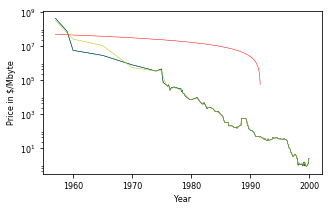

In [6]:
colors = {
    'Linear regression': 'r-',
    'Decision tree': 'g-',
    'Random forest': 'y-',
    'Ridge regression': 'bl-',
}


args = []

for (clf_name, clf) in clfs:
    _ = args.append(train_data.date)
    _ = args.append(clf.predict(train_data.date.reshape(-1, 1)))
    _ = args.append(colors[clf_name])


_ = plt.semilogy(train_data.date, train_data.price, 'b-', *args)
_ = plt.xlabel("Year")
_ = plt.ylabel("Price in $/Mbyte")

The decision tree and random forest regressor seem to overfit the data. The linear regression regressor has a lot of problems with the dataset, since the expected function is exponential, and not linear. To get a better result of the linear regression, the data should be rescaled, such that there is a linear relation. 

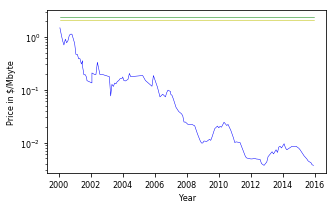

In [7]:
# Plot on test data

colors = {
    'Linear regression': 'r-',
    'Decision tree': 'g-',
    'Random forest': 'y-',
    'Ridge regression': 'bl-',
}

args = []

for (clf_name, clf) in clfs:
    _ =args.append(test_data.date)
    _ =args.append(clf.predict(test_data.date.reshape(-1, 1)))
    _ =args.append(colors[clf_name])

_ = plt.semilogy(test_data.date, test_data.price, 'b-', *args)
_ = plt.xlabel("Year")
_ = plt.ylabel("Price in $/Mbyte")

All three predictors do not give a meaningfull result. For the linear model the reason why has been explained already. The other two predictors gave very good results on the trainingset. However, they seemed to overfit the data. And this picture shows that. The two predictors have trouble to predict data points outside the range they have seen. This is not suprising, since this is an inherit problem of tree classifiers when used on regression. 

Train a Gaussian process on an increasing amount of samples of the training data. Start with 5 random sample and plot the predictions (both the mean and the uncertainty interval) for both training and test data, as shown in class. Now add a few more points and retrain and redraw. Do this a couple of times and interpret/explain what you see. Finally, train the Gaussian on the full dataset and again show plot the predictions. Evaluate on the test set using R2
R
2
. Compare these results with those achieved with other algorithms and explain.

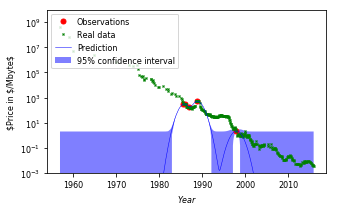

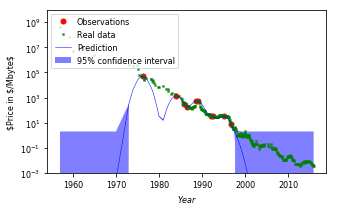

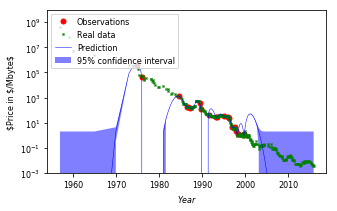

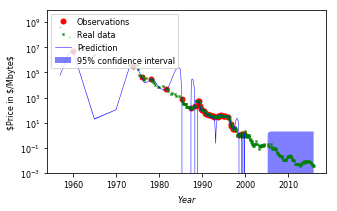

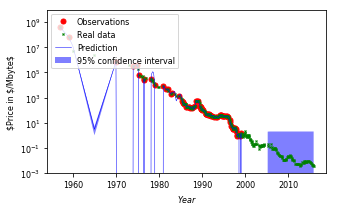

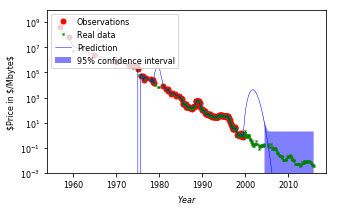

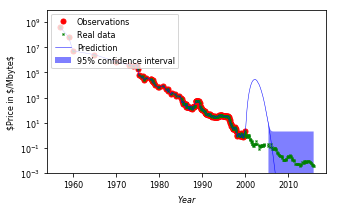

In [84]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split


# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
#x = np.atleast_2d(np.linspace(1970, 2010, 1000)).T
x = ram_prices.date.reshape(-1, 1)

for i in [5, 10, 20, 40, 80, 150, 202]: # 202 is full 

    if i != 202:
        X, _, y, _= train_test_split( train_data.date.reshape(-1, 1),
                                 train_data.price.ravel(),
                                 train_size=i)
    else:
        X = train_data.date.reshape(-1, 1)
        y = train_data.price.ravel()

    gp = GaussianProcessRegressor()

    # Fit to data using Maximum Likelihood Estimation of the parameters
    _ = gp.fit(X, y)

    # Make the prediction on the meshed x-axis (ask for MSE as well)
    y_pred, sigma = gp.predict(x, return_std=True)

    # Plot the function, the prediction and the 95% confidence interval based on
    # the MSE
    fig = plt.figure()
    _ = plt.ylim(10**-3, 10**10)
    _ = plt.semilogy(X, y, 'r.', markersize=10, label=u'Observations')
    _ = plt.semilogy(x, ram_prices.price.ravel(), 'gx', markersize=2, label=u'Real data')
    _ = plt.plot(x, y_pred, 'b-', label=u'Prediction')
    _ = plt.yscale('log')
    _ = plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
    _ = plt.xlabel('$Year$')
    _ = plt.ylabel('$Price in $/Mbyte$')
    _ = plt.legend(loc='upper left')

In [33]:
from sklearn.metrics import r2_score

X = ram_prices.date.reshape(-1, 1)
y = ram_prices.price.ravel()

gp = GaussianProcessRegressor()

# Fit to data using Maximum Likelihood Estimation of the parameters
_ = gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred =  gp.predict(x)

r2 = r2_score(y, y_pred)

print("r^2 score: {}".format(r2))



r^2 score: 0.9999999984788437


The R^2 score is very high, but this is due to overfitting. In the pictures above we can see that the predictor gives very good results for the datapoints that it has encountered. However, for datapoints that are outside the range of the datapoints, the classifier tends to predict very low results. Even when there is a gap between two datapoints, the classifier seems to like very low values. 

## A mini-data mining challenge (2 points (+1))

The goal here is to use everything you have learned to build the best model for a given classification task. The task is hosted on OpenML, so you will receive the train-test splits, and your model will be evaluated on the server. The goal is to reasonably select algorithms and hyperparameter settings to obtain the best model. You can also do model selection and parameter optimization as you have done before. Skeleton code is provided in the OpenML tutorial.

- All details can be found online:
    - The OpenML Task ID is 145676: http://www.openml.org/t/145676
    - The dataset description can be found here: http://www.openml.org/d/4537
- A leaderboard is kept of the best models: http://www.openml.org/t/145676#!people
    - You are able to see the solutions of others (by clicking in the timeline or run list), but resubmission of the exact same solution does not register on the leaderboard.
    - You can share one account (one API key) per team. In case you use two, we take the one that performs best.
- You can document the different experiments that you ran in this notebook. For each experiment, provide a description of how you chose the algorithms and parameters that you submitted. Try to reason about which experiments to try, don't just do an immense random search.
- Points are rewarded as follows:
    - 1 point for the breadth of experiments you ran (algorithms, hyperparameter settings)
    - 1 point for reasoning/insight and interpretation of the results
    - 1 (bonus) point for every team who has uploaded the best solution thus far **on AUC** (who reaches the top of the leaderboard at any moment during the assignment)
        - Note: On the leaderboard page, the 'frontier' line is drawn, and your top ranking is also shown in the table.
        
Note: Report AUC scores in your report as well. In case of issues with OpenML we will use the experiments and scores mentioned your report.